In [1]:
from read_tiles import TissueDataset, load_color_normalization_values
import h5py
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HDF5_TRAIN= '/media/nico/data/fourthbrain/project/training_CAMELYON16/'

In [3]:
train_data = TissueDataset(HDF5_TRAIN,  percentage=1, first_part=True)

In [4]:
def plot_samples(itera, num_samples=2):
    plt.figure(figsize=(12,4))
    for x, y in itera:
        print(x.shape)
        for i in range(num_samples):
            ax = plt.subplot(1, num_samples, i + 1)
            plt.tight_layout()
            ax.set_title('Sample #{} - class {}'.format(i, y[i]))
            ax.imshow(x[i])
            ax.axis('off') 
        break # generate yields infinite random samples, so we stop after first

In [5]:
x, y = train_data.get_batch(num_neg=3, num_pos=3)
print(x.shape)
print(y)

(6, 256, 256, 3)
[0. 0. 0. 1. 1. 1.]


In [6]:
itera_no_norm = train_data.generator(num_neg=1, num_pos=1, data_augm=True, color_normalization_file=None)

(2, 256, 256, 3)


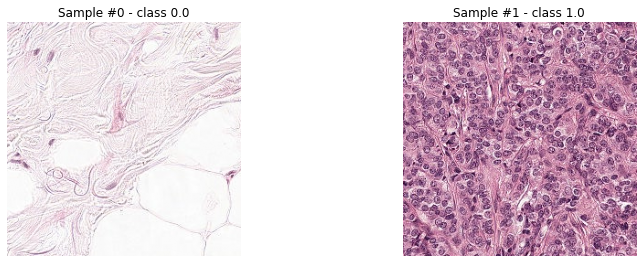

In [7]:
plot_samples(itera_no_norm, num_samples=2)

With color normalization

In [8]:
mean, std = load_color_normalization_values("CAMELYON16_color_normalization.json")

- All channels

In [9]:
itera_rgb = train_data.generator(num_neg=1, num_pos=1, data_augm=True, green_layer_only=False, color_normalization_file="CAMELYON16_color_normalization.json")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


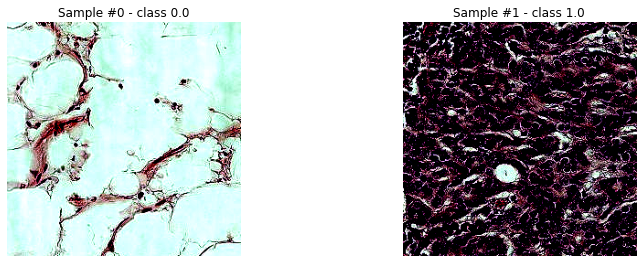

In [10]:
plot_samples(itera_rgb, num_samples=2)

- Green channel only

In [11]:
itera_g = train_data.generator(num_neg=1, num_pos=1, data_augm=True, green_layer_only=True, color_normalization_file="CAMELYON16_color_normalization.json")

(2, 256, 256)


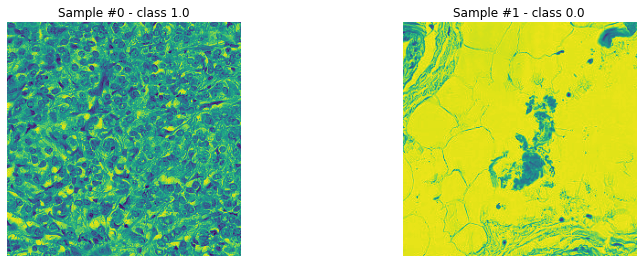

In [12]:
plot_samples(itera_g, num_samples=2)

In [13]:
HDF5_TEST= '/media/nico/data/fourthbrain/project/training_CAMELYON16/'

In [14]:
test_data = TissueDataset(HDF5_TEST,  percentage=1, first_part=True)

In [15]:
itera_test_no_norm = test_data.generator(num_neg=1, num_pos=1, data_augm=False, color_normalization_file=None)

(2, 256, 256, 3)


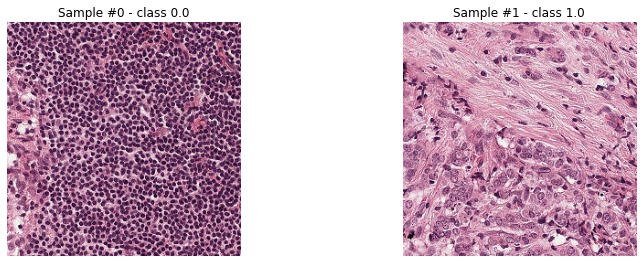

In [16]:
plot_samples(itera_test_no_norm, num_samples=2)

In [17]:
itera_test_norm = test_data.generator(num_neg=1, num_pos=1, data_augm=False, color_normalization_file="CAMELYON16_color_normalization.json")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 256, 256, 3)


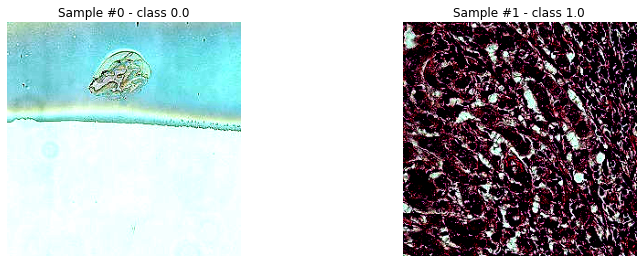

In [18]:
plot_samples(itera_test_norm, num_samples=2)

In [19]:
itera_test_norm_green = test_data.generator(num_neg=1, num_pos=1, data_augm=False, green_layer_only=True, color_normalization_file="CAMELYON16_color_normalization.json")

(2, 256, 256)


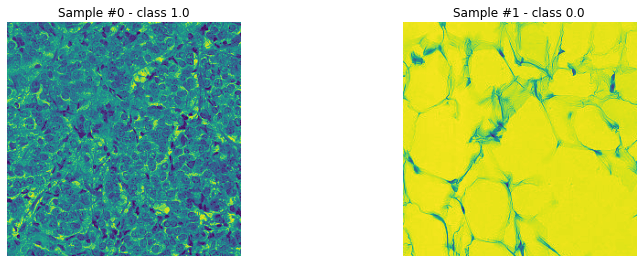

In [20]:
plot_samples(itera_test_norm_green, num_samples=2)